In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from growth.measure.fluorescence import Fluorescence
%matplotlib inline

In [2]:
fluorescence = Fluorescence(ambiguity=.1)

In [5]:
from growth.cells.cultures import Culture

In [6]:
culture = Culture()

In [11]:
culture.grow(min_population=2**9)

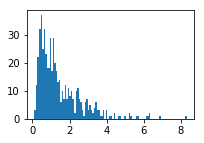

In [47]:
fig, ax = plt.subplots(figsize=(3, 2))
x = culture.measure(ambiguity=0.5).fluorescence.values
_ = ax.hist(x, bins=100)

In [31]:
np.median(culture.generations)

12.0

(array([  3.,  56.,  34.,  83.,  49., 161., 105.,  30.,  19.,   7.]),
 array([ 4. ,  5.6,  7.2,  8.8, 10.4, 12. , 13.6, 15.2, 16.8, 18.4, 20. ]),
 <a list of 10 Patch objects>)

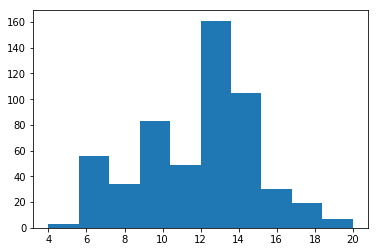

In [30]:
plt.hist(culture.generations)

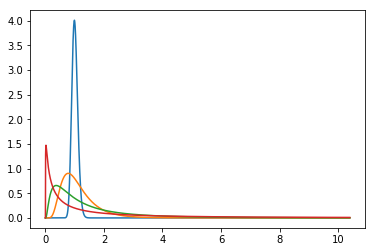

In [327]:
import scipy.stats as st


for s in [0.1, .5, 1., 2.]:
    lognormal = st.lognorm(s, loc=0)
    plt.plot(old.support, lognormal.pdf(old.support))

In [381]:
class Model(Fluorescence):
    
    def __init__(self, mu=(0, 3, 4), sigma=(1, .3, .3), density=100000):
        self.set_loc(mu)
        self.set_scale(sigma)
        self.support = np.linspace(0, self.saturation, num=density)
        
    @classmethod
    def from_scale(cls, ambiguity=1):
        """ Instantiate fluorescence model from <scale>. """
        mu = np.log(np.logspace(-1, 1, base=2, num=3))
        sigma = np.ones(3) * ambiguity 
        return cls(mu=mu, sigma=sigma)
        
    def sample(self, genotypes):
        """ Draw luminescence samples for <genotypes>. """
        otypes = [np.float64]
        scale = np.vectorize(dict(enumerate(self.scale)).get, otypes=otypes)
        loc = np.vectorize(dict(enumerate(self.loc)).get, otypes=otypes)
        size = genotypes.size
        sample = np.random.lognormal(
            mean=loc(genotypes),
            sigma=scale(genotypes),
            size=size)
        return sample
    
    def freeze_univariate(self, i):
        """ Returns frozen model for <i>th univariate distribution. """
        return st.lognorm(self.scale[i], loc=0, scale=np.exp(self.loc[i]))


In [387]:
np.linspace(.1, 1., 10)

array([0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1. ])

In [386]:
np.logspace(-1, 1, base=2, num=3)

array([0.5, 1. , 2. ])

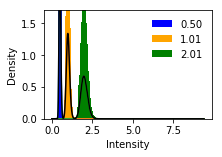

In [388]:
old = Model.from_scale(ambiguity=0.1)

N = 10000
m = old.sample(np.zeros(N)) 
h = old.sample(np.ones(N)) 
w = old.sample(2*np.ones(N)) 

bins = np.linspace(0, 8, 200)
fig, ax = plt.subplots(figsize=(3, 2))
_ = ax.hist(m, bins=bins, density=True, color='b', label='{:0.2f}'.format(m.mean()))
_ = ax.hist(h, bins=bins, density=True, color='orange', label='{:0.2f}'.format(h.mean()))
_ = ax.hist(w, bins=bins, density=True, color='g', label='{:0.2f}'.format(w.mean()))
_ = ax.legend(loc=0, frameon=False)

old.show_pdf(ax=ax)

In [284]:
old.loc

array([-0.69314718,  0.        ,  0.69314718])

In [ ]:
np.log(2)

In [242]:
np.log(4)

1.3862943611198906

array([1, 2, 4])

In [204]:
np.random.lognormal(0, 0., size=10000).mean()

1.0

In [169]:
12.19/1.66

7.343373493975903

[0.         0.69314718 1.38629436]


/Users/Sebi/.virtualenvs/clones/lib/python3.6/site-packages/numpy/lib/function_base.py:4291: RuntimeWarning: Invalid value encountered in percentile
  interpolation=interpolation)


ValueError: Axis limits cannot be NaN or Inf

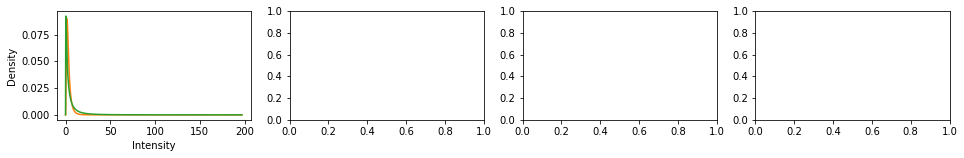

In [84]:

fig, axes = plt.subplots(ncols=4, figsize=(16, 2))
for i, magnitude in enumerate([1, 2, 3, 4]):
    ax = axes[i]
    new = Model.new(base=2, magnitude=magnitude)
    new.show_pdf(ax=ax)
    
    print(new.loc)

In [76]:
new.loc

array([ 1,  4, 16])